In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 30)

In [2]:
data = pd.read_csv('data/data_2016.csv')

# drop unused columns
data = data.drop(columns = ["romney12","obama12","otherpres12","demsen16","repsen16","othersen16",
                            "demgov16","repgov16","othergov16","repgov14","demgov14","othergov14"])

In [3]:
data

,state,county,fips,trump16,clinton16,otherpres16,demhouse16,rephouse16,otherhouse16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
0,Alabama,Autauga,1001,18172,5936,865,7544.0,14315.0,2258.0,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0
1,Alabama,Baldwin,1003,72883,18458,3874,0.0,76995.0,1991.0,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0
2,Alabama,Barbour,1005,5454,4871,144,5297.0,4286.0,463.0,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0
3,Alabama,Bibb,1007,6738,1874,207,1971.0,6670.0,15.0,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0
4,Alabama,Blount,1009,22859,2156,573,2390.0,22367.0,47.0,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,Wyoming,Sweetwater,56037,12154,3231,1745,6536.0,9234.0,1539.0,44812.0,30565.0,79.815674,0.865840,15.859591,20.184326,5.509685,47.824244,44.153352,9.417120,68233.0,5.072255,9.314606,78.628507,6.238463,76.606813,10.916313,5.0
3110,Wyoming,Teton,56039,3921,7314,1392,7417.0,4389.0,989.0,22623.0,16335.0,81.200548,0.614419,15.174822,18.799452,11.475048,48.097069,35.569995,11.837510,75594.0,2.123447,4.633570,46.211584,1.526877,41.769504,46.430920,7.0
3111,Wyoming,Uinta,56041,6154,1202,1114,1826.0,5686.0,1058.0,20893.0,14355.0,87.718375,0.186665,8.959939,12.281625,3.986981,49.327526,43.205858,10.678218,53323.0,6.390755,10.361224,81.793082,8.806312,81.080852,43.095937,7.0
3112,Wyoming,Washakie,56043,2911,532,371,799.0,2733.0,333.0,8351.0,6135.0,82.397318,0.790325,13.962400,17.602682,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,10.299738,75.980688,35.954529,7.0


In [4]:
# convert to pct
data['total_pres'] = data['trump16'] + data['clinton16'] + data['otherpres16']
data['total_house'] = data['demhouse16'] + data['rephouse16'] + data['otherhouse16']
data['trump16'] = data['trump16'] / data['total_pres']
data['clinton16'] = data['clinton16'] / data['total_pres']
data['demhouse16'] = data['demhouse16'] / data['total_house']
data['rephouse16'] = data['rephouse16'] / data['total_house']

# adding turnout variable
data['turnout'] = data['total_pres'] / data['cvap']

data = data.drop(columns = ['otherhouse16', 'otherpres16', 'total_pres', 'total_house'])
data.head()

,state,county,fips,trump16,clinton16,demhouse16,rephouse16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,turnout
0,Alabama,Autauga,1001,0.727666,0.237697,0.312808,0.593565,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0,0.613738
1,Alabama,Baldwin,1003,0.765457,0.193856,0.000000,0.974793,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0,0.627364
2,Alabama,Barbour,1005,0.520967,0.465278,0.527275,0.426637,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0,0.513816
3,Alabama,Bibb,1007,0.764032,0.212496,0.227703,0.770564,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0,0.501364
4,Alabama,Blount,1009,0.893348,0.084258,0.096355,0.901750,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0,0.603064


In [5]:
#quantifying split = (pres_pct - sen_pct)
data['trump_diff'] = (data['trump16'] - data['rephouse16']) * 100
data['clinton_diff'] = (data['clinton16'] - data['demhouse16']) * 100
data.head()

,state,county,fips,trump16,clinton16,demhouse16,rephouse16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,turnout,trump_diff,clinton_diff
0,Alabama,Autauga,1001,0.727666,0.237697,0.312808,0.593565,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0,0.613738,13.410117,-7.511168
1,Alabama,Baldwin,1003,0.765457,0.193856,0.000000,0.974793,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0,0.627364,-20.933588,19.385601
2,Alabama,Barbour,1005,0.520967,0.465278,0.527275,0.426637,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0,0.513816,9.432920,-6.199610
3,Alabama,Bibb,1007,0.764032,0.212496,0.227703,0.770564,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0,0.501364,-0.653157,-1.520758
4,Alabama,Blount,1009,0.893348,0.084258,0.096355,0.901750,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0,0.603064,-0.840127,-1.209718


In [6]:
# defining vote-splitting as average absolute % difference between parties' presidential vote and their house vote
# --> (abs(R_pres_pct - R_house_pct) + abs(D_pres_pct - D_house_pct)) / 2
data['split_index'] = abs(data['trump_diff']) + abs(data['clinton_diff']) / 2
data

,state,county,fips,trump16,clinton16,demhouse16,rephouse16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,turnout,trump_diff,clinton_diff,split_index
0,Alabama,Autauga,1001,0.727666,0.237697,0.312808,0.593565,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0,0.613738,13.410117,-7.511168,17.165701
1,Alabama,Baldwin,1003,0.765457,0.193856,0.000000,0.974793,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0,0.627364,-20.933588,19.385601,30.626388
2,Alabama,Barbour,1005,0.520967,0.465278,0.527275,0.426637,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0,0.513816,9.432920,-6.199610,12.532724
3,Alabama,Bibb,1007,0.764032,0.212496,0.227703,0.770564,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0,0.501364,-0.653157,-1.520758,1.413536
4,Alabama,Blount,1009,0.893348,0.084258,0.096355,0.901750,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0,0.603064,-0.840127,-1.209718,1.444986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,Wyoming,Sweetwater,56037,0.709515,0.188616,0.377607,0.533480,44812.0,30565.0,79.815674,0.865840,15.859591,20.184326,5.509685,47.824244,44.153352,9.417120,68233.0,5.072255,9.314606,78.628507,6.238463,76.606813,10.916313,5.0,0.560445,17.603578,-18.899056,27.053106
3110,Wyoming,Teton,56039,0.310525,0.579235,0.579680,0.343025,22623.0,16335.0,81.200548,0.614419,15.174822,18.799452,11.475048,48.097069,35.569995,11.837510,75594.0,2.123447,4.633570,46.211584,1.526877,41.769504,46.430920,7.0,0.773003,-3.249955,-0.044459,3.272185
3111,Wyoming,Uinta,56041,0.726564,0.141913,0.213069,0.663477,20893.0,14355.0,87.718375,0.186665,8.959939,12.281625,3.986981,49.327526,43.205858,10.678218,53323.0,6.390755,10.361224,81.793082,8.806312,81.080852,43.095937,7.0,0.590038,6.308710,-7.115621,9.866520
3112,Wyoming,Washakie,56043,0.763241,0.139486,0.206727,0.707115,8351.0,6135.0,82.397318,0.790325,13.962400,17.602682,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,10.299738,75.980688,35.954529,7.0,0.621679,5.612556,-6.724093,8.974602


In [7]:
# join with FIPS codes for Highcharts
fips = pd.read_csv('data/fips.csv', encoding='cp1252')[['fips', 'state_abbr', 'long_name']]
fips
data = data.merge(fips, on='fips', how='left').drop(1799).reset_index(drop = True)
data['name'] = data['long_name'].apply(lambda x : (x[:-3] + ',' + x[-3:]))

code_list = []
for idx in data.index:
    code_list.append('us-' + data.iloc[idx]['state_abbr'].lower() + '-' + str(data.iloc[idx]['fips'])[-3:])
code_list
data['code'] = code_list
data = data.drop(columns = ['long_name', 'state_abbr'])
data.head()

,state,county,fips,trump16,clinton16,demhouse16,rephouse16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,...,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,turnout,trump_diff,clinton_diff,split_index,name,code
0,Alabama,Autauga,1001,0.727666,0.237697,0.312808,0.593565,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,...,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0,0.613738,13.410117,-7.511168,17.165701,"Autauga County, AL",us-al-001
1,Alabama,Baldwin,1003,0.765457,0.193856,0.000000,0.974793,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,...,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0,0.627364,-20.933588,19.385601,30.626388,"Baldwin County, AL",us-al-003
2,Alabama,Barbour,1005,0.520967,0.465278,0.527275,0.426637,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,...,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0,0.513816,9.432920,-6.199610,12.532724,"Barbour County, AL",us-al-005
3,Alabama,Bibb,1007,0.764032,0.212496,0.227703,0.770564,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,...,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0,0.501364,-0.653157,-1.520758,1.413536,"Bibb County, AL",us-al-007
4,Alabama,Blount,1009,0.893348,0.084258,0.096355,0.901750,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,...,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0,0.603064,-0.840127,-1.209718,1.444986,"Blount County, AL",us-al-009


In [8]:
data.to_json('data/data.json', orient = 'records')
data.to_csv('data/data.csv', index = False)

In [9]:
data[['code', 'trump_diff']].to_csv('data/trump_diff.csv', index = False)
data[['code', 'clinton_diff']].to_csv('data/clinton_diff.csv', index = False)

In [10]:
print(max(data['trump_diff']))
print(max(data['clinton_diff']))
print(min(data['trump_diff']))
print(min(data['clinton_diff']))

58.92532778690508
75.44692737430168
-76.45251396648045
-63.95341016187164


In [16]:
trump = data[['state', 'county', 'code', 'trump_diff', 'total_population', 'white_pct', 'black_pct', 
              'foreignborn_pct', 'median_hh_inc', 'lesscollege_pct', 'lesscollege_whites_pct', 
              'rural_pct']].copy(deep = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C535E68>,
      dtype=object)

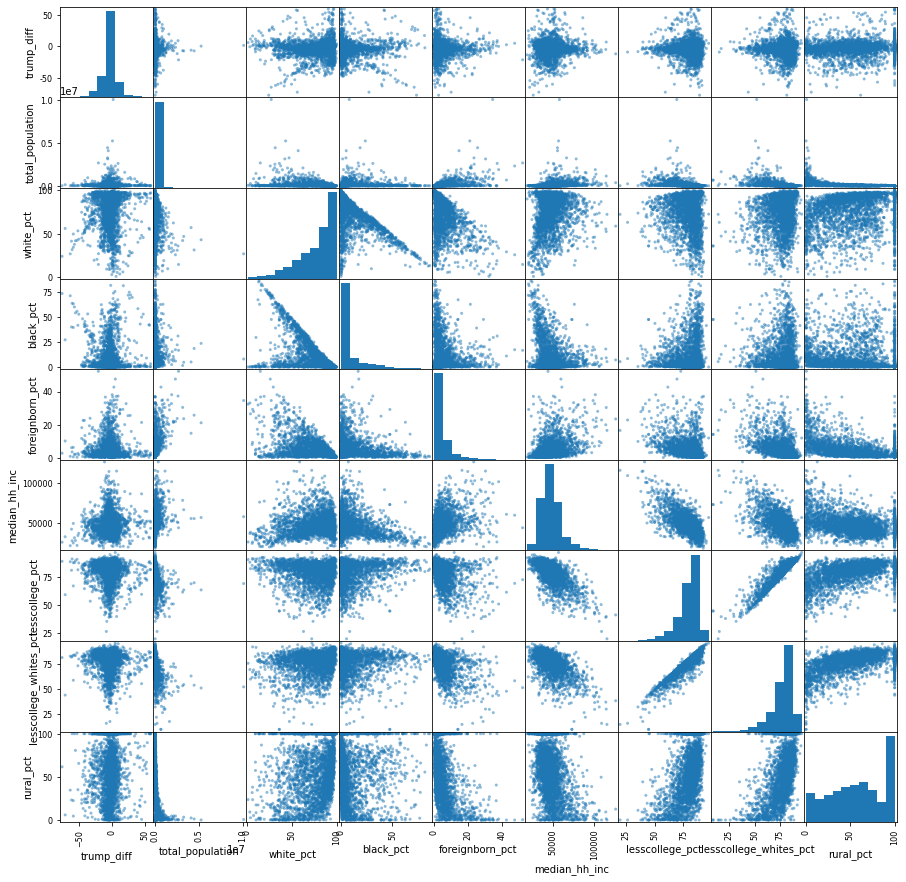

In [24]:
pd.plotting.scatter_matrix(trump, figsize = (15, 15))